### Importing Dependencies and Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

In [2]:
DATA_PATH = '../data/SaYoPillow.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


#### Data preparation

In [3]:
df.columns = ['snoring_rate','respiration_rate','body_temperature','limb_movement','blood_oxygen','eye_movement','sleeping_hours','heart_rate','stress_level']

In [4]:
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


- It can be observed that the dataset consists of 9 columns and 630 rows.
- There are no null values in the dataset.
- All columns are of numeric type. 8 of them are of type float64, and 1 is of type int64.

### EDA

### snoring rate

In [6]:
df.snoring_rate.describe()

count    630.000000
mean      71.600000
std       19.372833
min       45.000000
25%       52.500000
50%       70.000000
75%       91.250000
max      100.000000
Name: snoring_rate, dtype: float64

In [7]:
range_sr = df.snoring_rate.max() - df.snoring_rate.min()
range_sr

55.0

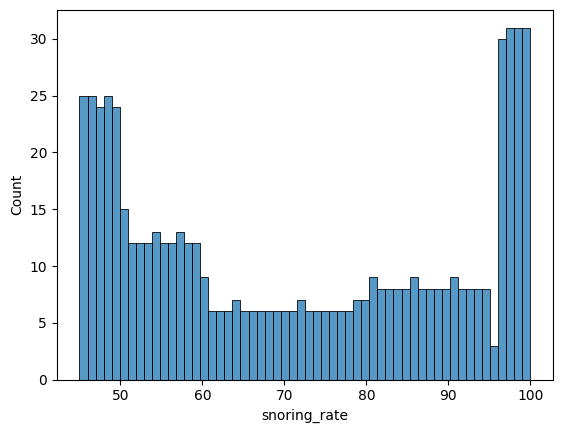

In [8]:
sns.histplot(df.snoring_rate, bins=55+1)
plt.show()

- The distribution of the "snoring rate" is not uniform.
- The majority of data repeats with users who have a higher "snoring rate," followed by those with less than 50.
- The remaining users with ranking values range between 6 and 15 patients.
- All users exhibit snoring.

In [9]:
mutual_info_score(round(df.snoring_rate), df.stress_level)

1.567625394207142

- Regarding the target variable, it is noted that the mutual information is quite significant between both variables.

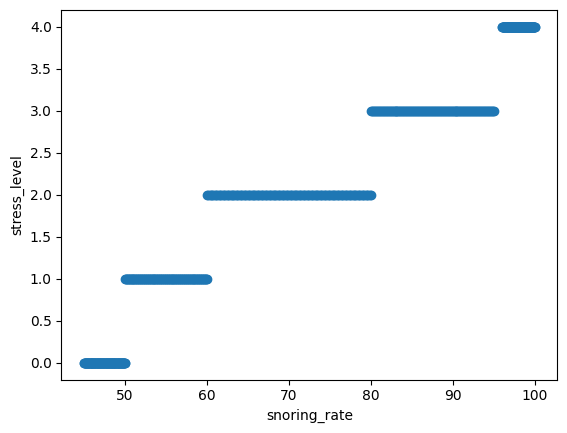

In [15]:
plt.scatter(df.snoring_rate, df.stress_level)
plt.xlabel('snoring_rate')
plt.ylabel('stress_level')
plt.show()

- We can also see that as the snoring rate increases, the stress level also increases, indicating that there is a relationship between these two variables.

### respiration rate

In [10]:
range_rr = df.respiration_rate.max() - df.respiration_rate.min()
range_rr

14.0

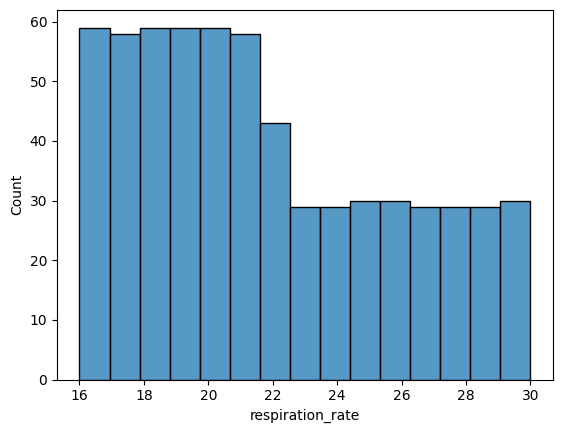

In [11]:
sns.histplot(df.respiration_rate, bins=14+1)
plt.show()

- Regarding the respiration rate, it is observed that the majority of the data falls between 15 and 20, suggesting that most individuals have a normal respiration rate.

In [12]:
mutual_info_score(round(df.respiration_rate), df.stress_level)

1.3849042156599067

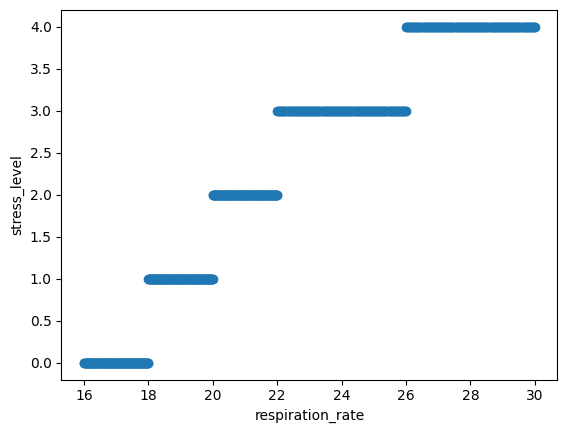

In [18]:
plt.scatter(df.respiration_rate, df.stress_level)
plt.xlabel('respiration_rate')
plt.ylabel('stress_level')
plt.show()

- As last feature, We can also see that as the respiration rate increases, the stress level also increases, indicating that there is a relationship between these two variables.

### Relation among all features

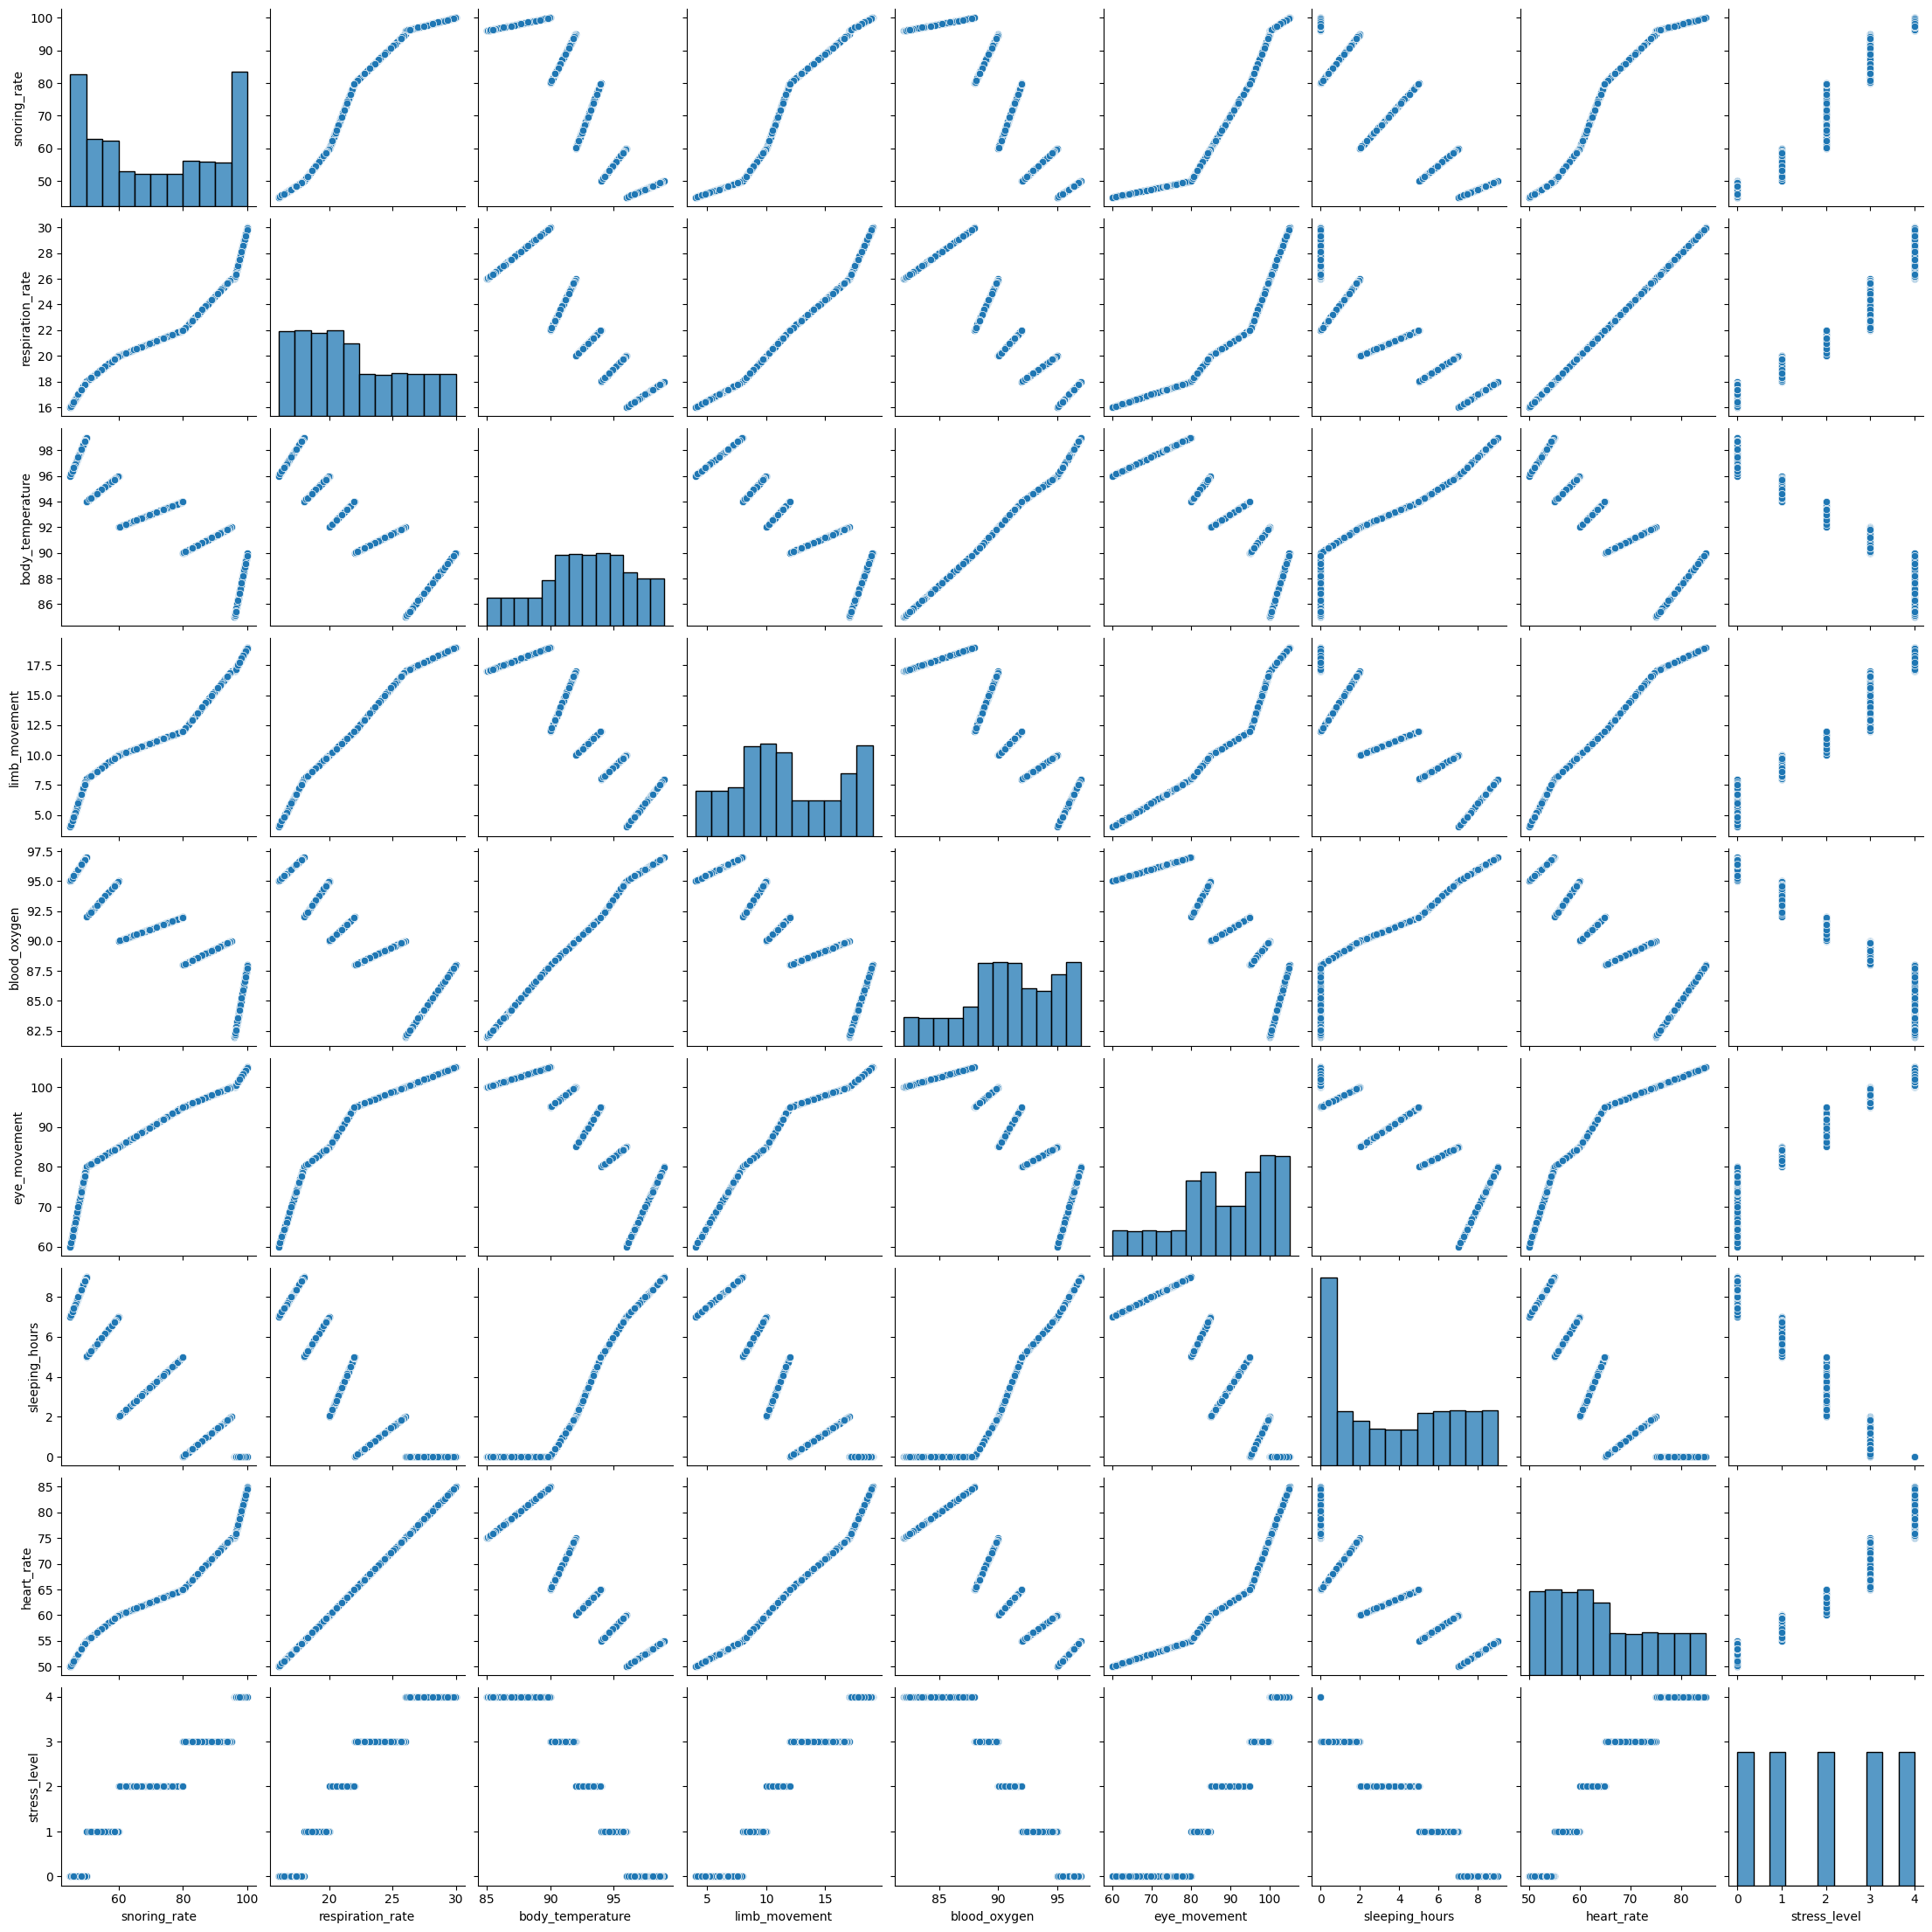

In [20]:
sns.pairplot(df)

From the graph, we can see that:

- All independent variables are related to the dependent variable, in this case, the stress level.
    - Some variables like snoring_rate, respiration_rate, limb_movement, eye_movement, and heart_rate have a positive relationship with the dependent variable.
    - Other variables like body_temperature, blood_oxygen, and sleeping_hours have a negative relationship with the dependent variable.
- All independent variables are related to each other. This is considered as multicollinearity:
    - This can negatively impact the interpretation of the model and the accuracy of the classification.
- The independent variable stress_level has a uniform distribution:
    -   All values of this variable have the same number of occurrences, helping to prevent bias in the model due to class imbalance.

### Model Selection

In [29]:
df_train, df_val = train_test_split(df, test_size=0.20, random_state=1, stratify=df.stress_level)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.stress_level.values
y_val = df_val.stress_level.values

del df_train['stress_level']
del df_val['stress_level']

In [30]:
len(df_train), len(df_val), len(y_train), len(y_val)

(504, 126, 504, 126)

### Model

In [31]:
logreg = LogisticRegression(solver='liblinear', random_state=1)
logreg.fit(df_train, y_train)

y_pred = logreg.predict(df_val)


In [40]:
confusion_matrix(y_val, y_pred)

array([[25,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 25,  0,  0],
       [ 0,  0,  0, 26,  0],
       [ 0,  0,  0,  0, 25]], dtype=int64)

- According to the confusion matrix, the model correctly predicts 100% of stress_level cases for each class.

In [34]:
y_pred == y_val

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

- It was expected that the predicted variable would be equal to the validation variable.

In [53]:
for i in df_train.columns:
    df_train_new = df_train.drop(i, axis=1)
    df_val_new = df_val.drop(i, axis=1)
    logreg = LogisticRegression(solver='liblinear', random_state=1)
    logreg.fit(df_train_new, y_train)

    y_pred = logreg.predict(df_val_new)

    print(i,accuracy_score(y_val, y_pred))


snoring_rate 1.0
respiration_rate 1.0
body_temperature 1.0
limb_movement 1.0
blood_oxygen 1.0
eye_movement 1.0
sleeping_hours 0.9365079365079365
heart_rate 1.0


- This indicates that by removing the 'sleeping_hours' column, the worst result is obtained. Therefore, it can be concluded that this column is the most important for the model.

### Feature selection

- We can perform feature selection to reduce the number of variables and improve the model's performance. While in this case, we already achieve 100% accuracy, we can decrease the number of features while maintaining the same 100% accuracy, which might make the model more efficient in terms of execution speed.

#### Iterate over the features and check the accuracy of each one

In [94]:
columnas = ['snoring_rate','respiration_rate','body_temperature','limb_movement','blood_oxygen','eye_movement','sleeping_hours','heart_rate']
resultable = []
for i in range(8):
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(df_train.iloc[:,[i]], y_train)

    y_pred = model.predict(df_val.iloc[:,[i]])

    accuracy = accuracy_score(y_val, y_pred)

    resultable.append([columnas[i], accuracy])

In [95]:
resultable = pd.DataFrame(resultable, columns=['Feature', 'Accuracy'])
resultable

,Feature,Accuracy
0,snoring_rate,0.666667
1,respiration_rate,0.706349
2,body_temperature,0.396825
3,limb_movement,0.857143
4,blood_oxygen,0.396825
5,eye_movement,0.603175
6,sleeping_hours,0.801587
7,heart_rate,0.674603


#### Sort by Accuracy

In [97]:
best_result_table = resultable.sort_values('Accuracy', ascending=False)
best_result_table.reset_index(drop=True, inplace=True)
best_result_table

,Feature,Accuracy
0,limb_movement,0.857143
1,sleeping_hours,0.801587
2,respiration_rate,0.706349
3,heart_rate,0.674603
4,snoring_rate,0.666667
5,eye_movement,0.603175
6,body_temperature,0.396825
7,blood_oxygen,0.396825


In [109]:
featuresN = [best_result_table.Feature[0]]
limit = best_result_table.Accuracy[0]

In [110]:
for i in range(1, 8):
    featuresN.append(best_result_table.iloc[i, 0])
    datosZ = df_train.loc[:, featuresN]
    modeloZ = LogisticRegression(solver='liblinear', random_state=1)
    modeloZ.fit(datosZ, y_train)
    
    prediccionesZ = modeloZ.predict(df_val.loc[:, featuresN])
    
    accuracyZ = accuracy_score(y_val, prediccionesZ)

    print(featuresN, accuracyZ)
    
    if accuracyZ > limit:
        limit = accuracyZ
    else:
        del featuresN[-1]

print(len(featuresN))
print(limit)

['limb_movement', 'sleeping_hours'] 0.9047619047619048
['limb_movement', 'sleeping_hours', 'respiration_rate'] 0.8888888888888888
['limb_movement', 'sleeping_hours', 'heart_rate'] 0.8809523809523809
['limb_movement', 'sleeping_hours', 'snoring_rate'] 0.9682539682539683
['limb_movement', 'sleeping_hours', 'snoring_rate', 'eye_movement'] 0.9920634920634921
['limb_movement', 'sleeping_hours', 'snoring_rate', 'eye_movement', 'body_temperature'] 1.0
['limb_movement', 'sleeping_hours', 'snoring_rate', 'eye_movement', 'body_temperature', 'blood_oxygen'] 1.0
5
1.0


- It is observed that the number of features can be reduced from 8 to 5 while achieving the same accuracy.

- Reducing the number of features in machine learning model creation can be beneficial for several reasons:
    - Improved Efficiency: Fewer features can result in faster model training and execution, which is crucial for large datasets.
    - Overfitting Prevention: With fewer features, the model is less prone to overfitting, i.e., fitting too closely to the specifics of the training set and less efficiently generalizing to new data.
    - Simplified Interpretation: A model with fewer features is easier to interpret and understand, which can be crucial in applications where transparency and explainability are important.

### Final model

In [112]:
final_model = LogisticRegression(solver='liblinear', random_state=1)
final_model.fit(df_train.loc[:, featuresN], y_train)

y_pred = final_model.predict(df_val.loc[:, featuresN])

accuracy_score(y_val, y_pred)

1.0

In [113]:
df_train.loc[:, featuresN].columns

Index(['limb_movement', 'sleeping_hours', 'snoring_rate', 'eye_movement',
       'body_temperature'],
      dtype='object')